In [1]:
'''This code performed linear regression on synthetically generated dataset with 4 features and 100 samples
'''
import numpy as np
import matplotlib.pyplot as plt

# synthetic data (100 samples, 4 features)
np.random.seed(42)
X = np.random.rand(100, 4) 
# True weight and bias
w_true = np.array([1.5, -2.0, 3.0, 0.5])  # Random coefficients for features
b_true = 1.0  # Bias term

# Linear relationship with some noise
y = np.dot(X, w_true) + b_true + np.random.randn(100) * 0.1  # Add some Gaussian noise

# training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial weights and bias
w = np.zeros(X_train.shape[1])  # should match with number of features
b = 0.01  
lr = 0.01  
iterations = 1000  

losses = []  # loss values

def compute_gradients(X, y, w, b):
    n = len(y)
    y_pred = np.dot(X, w) + b  # Compute predictions
    error = y_pred - y  # Compute error

    w_grad = (2 / n) * np.dot(X.T, error)  # Compute gradient for weights
    b_grad = (2 / n) * np.sum(error)  # Compute gradient for bias

    return w_grad, b_grad

def compute_loss(X, y, w, b):
    n = len(y)
    y_pred = np.dot(X, w) + b  # Compute predictions
    loss = np.mean((y_pred - y) ** 2)  # Mean Squared Error (MSE)
    return loss

# Gradient Descent Loop, weight and bias update
for i in range(iterations):
    w_grad, b_grad = compute_gradients(X_train, y_train, w, b)
    w -= lr * w_grad  
    b -= lr * b_grad 
    loss = compute_loss(X_train, y_train, w, b)
    losses.append(loss)  

# Final values
print(f"Updated weights: {w}")
print(f"Updated bias: {b}")

# Loss Function Plot
plt.plot(range(iterations), losses, color='red', label="Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss Function Convergence")
plt.legend()
plt.show()

# Model Test
y_pred_test = np.dot(X_test, w) + b  # predictions on test data
test_loss = compute_loss(X_test, y_test, w, b)
print(f"Test Loss (MSE): {test_loss}")

'This code performed linear regression on synthetically generated dataset with 4 features and 100 samples\n'

In [ ]:
'''Test in actual data sets'''

In [2]:
# The above code is tested for actual Salary data

import pandas as pd
df=pd.read_csv('Salary_Data.csv')
df.head()
#df.columns

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.shape

(6704, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [6]:
df.describe(include='object')

,Gender,Education Level,Job Title
count,6702,6701,6702
unique,3,7,193
top,Male,Bachelor's Degree,Software Engineer
freq,3674,2267,518


In [7]:
df2=df.dropna()

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [9]:
df2.isna().sum()/len(df2)

Age                    0.0
Gender                 0.0
Education Level        0.0
Job Title              0.0
Years of Experience    0.0
Salary                 0.0
dtype: float64

/tmp/ipykernel_9011/2066846625.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Gender'] = label_encoder.fit_transform(df2['Gender'])
/tmp/ipykernel_9011/2066846625.py:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.loc[:, 'Gender'] = label_encoder.fit_transform(df2['Gender'])
/tmp/ipykernel_9011/2066846625.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Updated weights: [-0.01720743  0.01021503  0.01526207 -0.00755228  0.17688316]
Updated bias: 0.4619344493557484


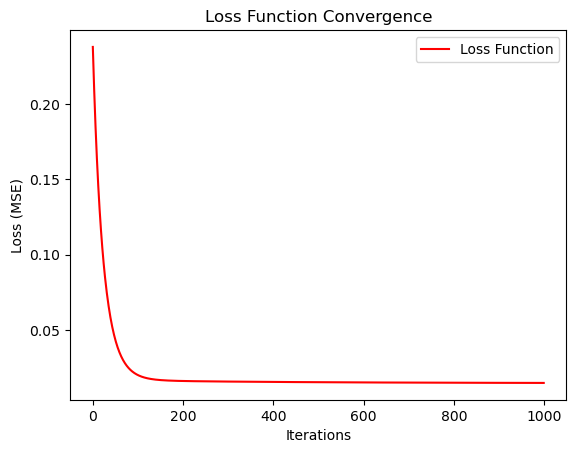

Test Loss (MSE): 0.015028186763965294


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder





# Encoding categorical
label_encoder = LabelEncoder()



# Encode categorical columns (Gender, Education Level, Job Title)
df2.loc[:, 'Gender'] = label_encoder.fit_transform(df2['Gender'])
df2.loc[:, 'Education Level'] = label_encoder.fit_transform(df2['Education Level'])
df2.loc[:, 'Job Title'] = label_encoder.fit_transform(df2['Job Title'])

# Define X (features) and y (target)
X = df2[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']].values
y = df2['Salary'].values/max(df['Salary'])

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# train test splits (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights and bias
w = np.zeros(X_train.shape[1])  # Should match number of features
b = 0.01  
lr = 0.01  # Learning rate
iterations = 1000  

losses = []  # Loss values
losses_train = []  # To store training losses
losses_test = []

# Function to compute gradients
def compute_gradients(X, y, w, b):
    n = len(y)
    y_pred = np.dot(X, w) + b  # Compute predictions
    error = y_pred - y  # Compute error

    w_grad = (2 / n) * np.dot(X.T, error)  # Compute gradient for weights
    b_grad = (2 / n) * np.sum(error)  # Compute gradient for bias

    return w_grad, b_grad

# Function to compute the loss (MSE)
def compute_loss(X, y, w, b):
    n = len(y)
    y_pred = np.dot(X, w) + b  # Compute predictions
    loss = np.mean((y_pred - y) ** 2)  # Mean Squared Error (MSE)
    return loss

# Gradient Descent Loop for updating weights and bias
for i in range(iterations):
    w_grad, b_grad = compute_gradients(X_train, y_train, w, b)
    w -= lr * w_grad  
    b -= lr * b_grad 
    loss = compute_loss(X_train, y_train, w, b)
    losses.append(loss) 
     
    # Compute the training and test losses
    train_loss = compute_loss(X_train, y_train, w, b)
    test_loss = compute_loss(X_test, y_test, w, b)
    
    # Store the losses
    losses_train.append(train_loss)
    losses_test.append(test_loss)

# Final values of weights and bias
print(f"Updated weights: {w}")
print(f"Updated bias: {b}")

# Loss function convergence plot
plt.plot(range(iterations), losses, color='red', label="Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss Function Convergence")
plt.legend()
plt.show()

# Testing the model with test data
y_pred_test = np.dot(X_test, w) + b  # Predictions on test data
test_loss = compute_loss(X_test, y_test, w, b)
print(f"Test Loss (MSE): {test_loss}")

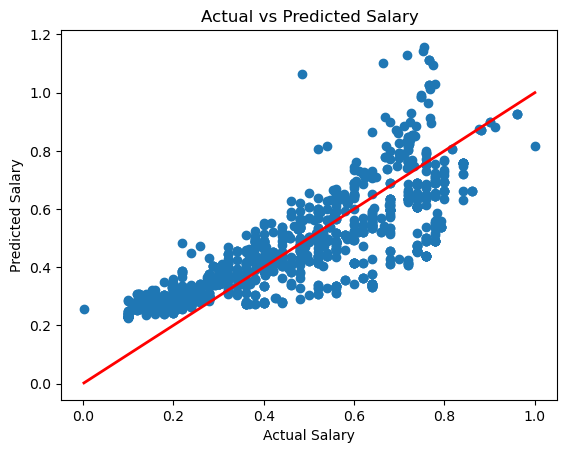

In [11]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Ideal line
plt.show()

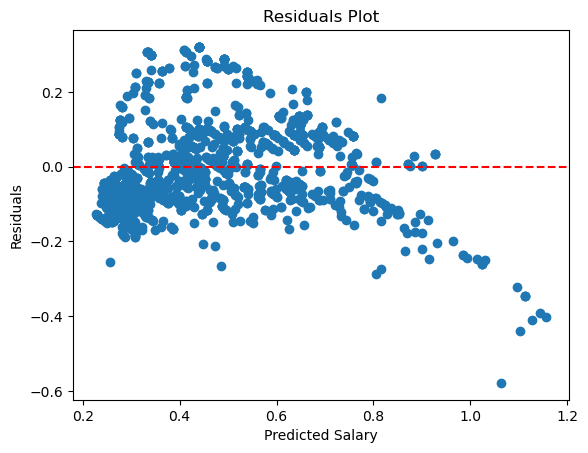

In [12]:
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

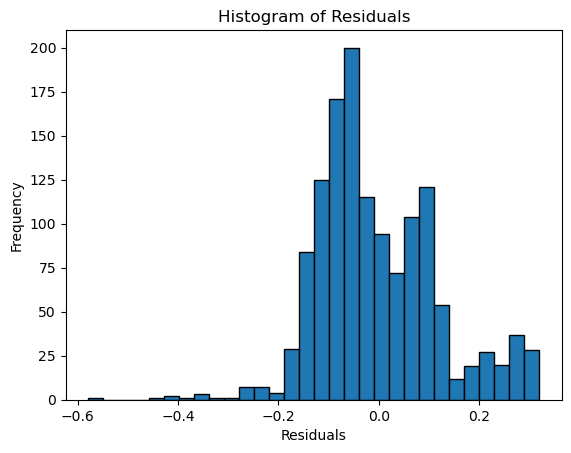

In [13]:
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

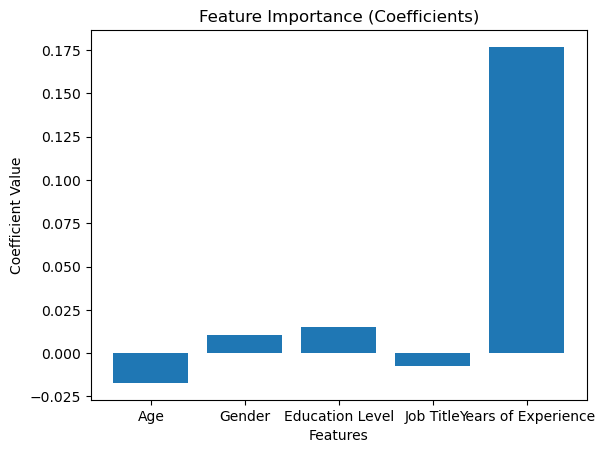

In [14]:
feature_names = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']
plt.bar(feature_names, w)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance (Coefficients)")
plt.show()

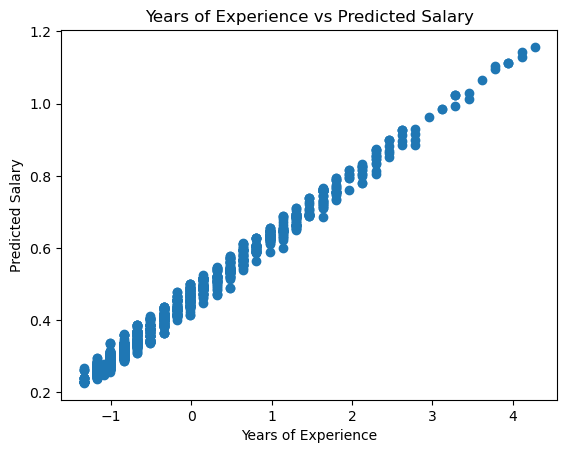

In [15]:
plt.scatter(X_test[:, 4], y_pred_test)  # Assuming 'Years of Experience' is the 5th feature
plt.xlabel("Years of Experience")
plt.ylabel("Predicted Salary")
plt.title("Years of Experience vs Predicted Salary")
plt.show()


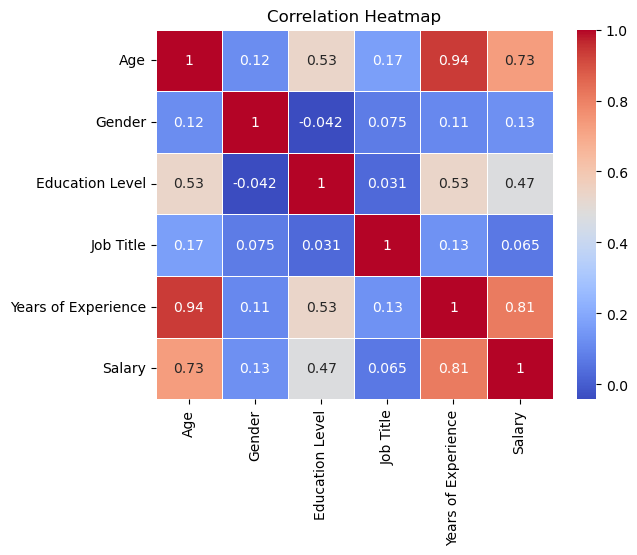

In [16]:
import seaborn as sns

# DataFrame to calculate the correlation matrix
df_features = pd.DataFrame(X, columns=['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience'])
df_features['Salary'] = y

# Correlation matrix plot
corr_matrix = df_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


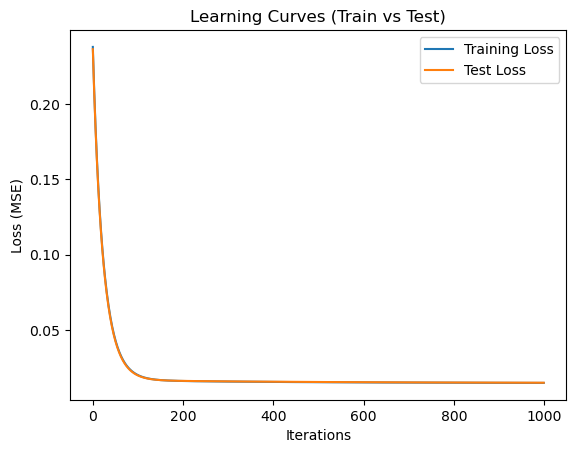

In [17]:
plt.plot(range(iterations), losses_train, label="Training Loss")
plt.plot(range(iterations), losses_test, label="Test Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Learning Curves (Train vs Test)")
plt.legend()
plt.show()

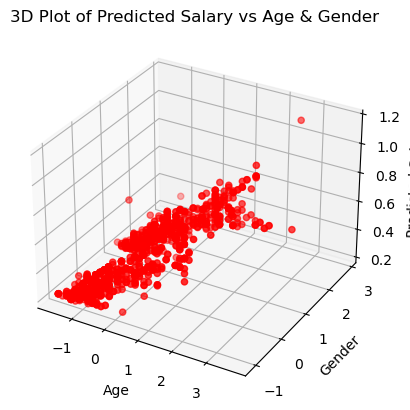

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Choose two features for 3D visualization
x = X_test[:, 0]  # Age
y = X_test[:, 1]  # Gender
z = y_pred_test   # Predicted Salary

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Gender')
ax.set_zlabel('Predicted Salary')
plt.title("3D Plot of Predicted Salary vs Age & Gender")
plt.show()

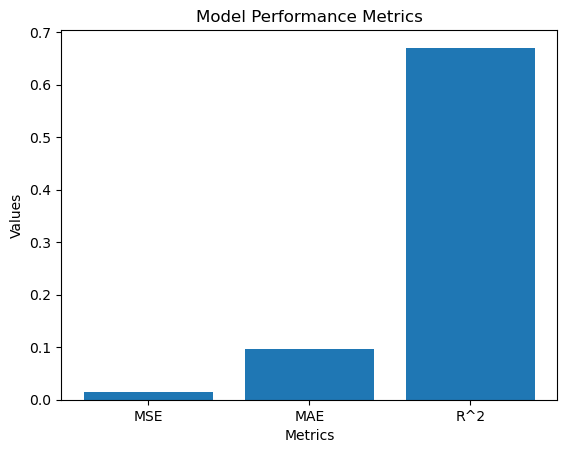

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE and R^2
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Plot the metrics
metrics = ['MSE', 'MAE', 'R^2']
values = [test_loss, mae, r2]

plt.bar(metrics, values)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Model Performance Metrics")
plt.show()

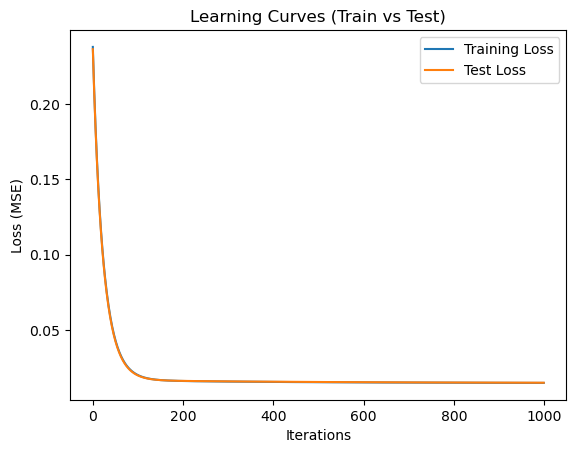

In [22]:
# Plot learning curves
plt.plot(range(iterations), losses_train, label="Training Loss")
plt.plot(range(iterations), losses_test, label="Test Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Learning Curves (Train vs Test)")
plt.legend()
plt.show()